In [1]:
from ipynb.fs.defs.save_data_2classes import *

from ipynb.fs.defs.save_data_4classes import *

from ipynb.fs.defs.plot import *

from ipynb.fs.defs.model import *

from ipynb.fs.defs.mfcc import *

from sklearn.metrics import confusion_matrix

In [2]:
x_train4, x_test4, y_train4, y_test4, y_cat_train4, y_cat_test4, sr4 = make_data_4class("dagmerd3_chunked", "dagmerd7_chunked", "nattmerd3_chunked", "nattmerd7_chunked", r"C:\Users\jemilad\OneDrive - SINTEF\Desktop\audio", 4)




loading... category: dagmerd3_chunked
loaded category: dagmerd3_chunked successfully
loading... category: dagmerd7_chunked
loaded category: dagmerd7_chunked successfully
loading... category: nattmerd3_chunked
loaded category: nattmerd3_chunked successfully
loading... category: nattmerd7_chunked
loaded category: nattmerd7_chunked successfully


In [3]:
mfcc_train4, mfcc_test4 = mfcc_data(x_train4, x_test4, sr4)



Epoch 1/100
721/721 [==============================] - 4s 4ms/step - loss: 1.6368 - accuracy: 0.5574 - val_loss: 0.9235 - val_accuracy: 0.6704
Epoch 2/100
721/721 [==============================] - 3s 4ms/step - loss: 0.6709 - accuracy: 0.7354 - val_loss: 0.4640 - val_accuracy: 0.8327
Epoch 3/100
721/721 [==============================] - 3s 4ms/step - loss: 0.5421 - accuracy: 0.7869 - val_loss: 0.4351 - val_accuracy: 0.8346
Epoch 4/100
721/721 [==============================] - 3s 4ms/step - loss: 0.4978 - accuracy: 0.8108 - val_loss: 0.4302 - val_accuracy: 0.8265
Epoch 5/100
721/721 [==============================] - 3s 4ms/step - loss: 0.4622 - accuracy: 0.8238 - val_loss: 0.3974 - val_accuracy: 0.8683
Epoch 6/100
721/721 [==============================] - 3s 4ms/step - loss: 0.4435 - accuracy: 0.8321 - val_loss: 0.3500 - val_accuracy: 0.8714
Epoch 7/100
721/721 [==============================] - 3s 4ms/step - loss: 0.4029 - accuracy: 0.8468 - val_loss: 0.4125 - val_accuracy: 0.8246

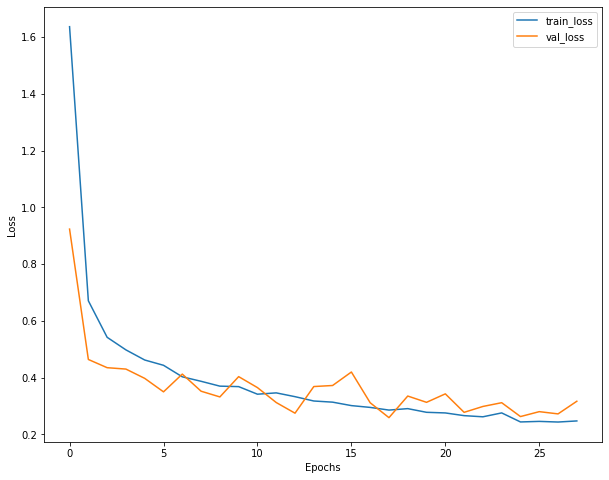

In [4]:
from keras.models import Sequential,Input,Model

import sklearn


model = model_cnn(4, mfcc_train4, y_cat_train4)



                   precision    recall  f1-score   support

 dagmerd3_chunked       0.84      0.95      0.89      1013
 dagmerd7_chunked       0.85      0.90      0.87       986
nattmerd3_chunked       0.93      0.80      0.86       990
nattmerd7_chunked       0.91      0.86      0.88      1014

         accuracy                           0.88      4003
        macro avg       0.88      0.88      0.88      4003
     weighted avg       0.88      0.88      0.88      4003



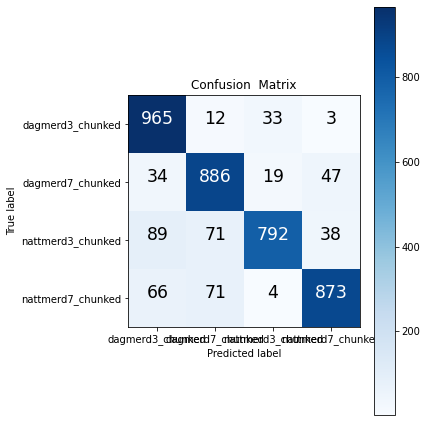

In [6]:

y_pred = model.predict(mfcc_test4)

targets = ["dagmerd3_chunked", "dagmerd7_chunked", "nattmerd3_chunked", "nattmerd7_chunked"]

y_predd=[]
for i in range(len(y_pred)):
    max_value = max(y_pred[i])
    index = np.where(y_pred[i] == max_value)
    y_predd.append(index[0][0])

cm = confusion_matrix(y_test4, y_predd)
plot_confusion_matrix(cm, targets)

class_rep = sklearn.metrics.classification_report(y_test4, y_predd, 
                                     target_names = targets)
print(class_rep)